# Complex Word Identification (CWI) - Transformer Model

=========== Project Code for CMT 318 Portfolio Assessment ==========

Module : Computational Linguistics

Code: 318

Name: Shreyas Ramachandran

Student ID: 24001871

==============================================================

This notebook features the performance analysis comparison of BERT and RoBERTa on a critical sub-task of Lexical Simplification - Complex Word Identification

All experiments have been conducted on colab to leverage powerful GPUs for faster training and evaluation.

## 1. Complexity Prediction
For complexity prediction, we use the CompLex dataset to train a BERT model (bert-base-uncased) and a RoBERTa model (roberta-large) to predict the complexity of a target word. The two models' performance is evaluated to compare the accuracy and pearson's corelation of the predicted complexity.

We also demonstrate the models' complexity prediction of example inputs


### IMPORTANT: All datasets and resources required for this code are provided in the zip file, under the datasets directory. Please refer readme file for further instructions on using the dataset files

## Install Dependencies

In [1]:
# Install required libraries
!pip install transformers torch datasets scipy pandas numpy evaluate tqdm wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 1. Complexity Prediction

### Section 1: Load the CompLex Datasets

This section defines a function to load and clean the CompLex datasets from TSV files.

We are loading the dataset files from our personal google drive, you can change the path accoridingly if you loading the dataset file from a different location.

All the dataset files are provided in the zip file. They can be uploaded into the session storage and ensure that the path url is modified accordingly


In [2]:
from transformers import BertTokenizer, BertForTokenClassification, RobertaTokenizer, RobertaForTokenClassification
import pandas as pd
import torch

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

def load_dataset(file_path):
    """
    Load and clean the dataset from the given file path.

    Parameters:
    file_path (str): Path to the dataset file.

    Returns:
    pd.DataFrame: Cleaned dataset.
    """
    df = pd.read_csv(file_path, sep='\t', usecols=['sentence', 'token', 'complexity'])
    # Remove the row containing headings if it exists
    if df.iloc[0]['sentence'] == 'sentence':
        df = df.iloc[1:]
    return df

# Define CompLex dataset file paths (Update with the correct path)
train_path = "/content/lcp_single_train.tsv"
trial_path = "/content/lcp_single_trial.tsv"

# Load datasets
complex_train_df = load_dataset(train_path)
complex_trial_df = load_dataset(trial_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

In [ ]:
complex_train_df.head()

,sentence,token,complexity
0,"Behold, there came up out of the river seven c...",river,0.000000
1,I am a fellow bondservant with you and with yo...,brothers,0.000000
2,"The man, the lord of the land, said to us, 'By...",brothers,0.050000
3,Shimei had sixteen sons and six daughters; but...,brothers,0.150000
4,He has put my brothers far from me.\tbrothers\...,sons,0.055556


In [ ]:
complex_trial_df.head()

,sentence,token,complexity
0,They will not hurt nor destroy in all my holy ...,sea,0.000000
1,"that sends ambassadors by the sea, even in ves...",sea,0.102941
2,"and they entered into the boat, and were going...",sea,0.109375
3,"Joseph laid up grain as the sand of the sea, v...",sea,0.160714
4,There will be a highway for the remnant that i...,land,0.000000


### Section 2: Dataset Analysis
This section provides a descriptive analysis of the dataset to provide an insight on the complexity distribution

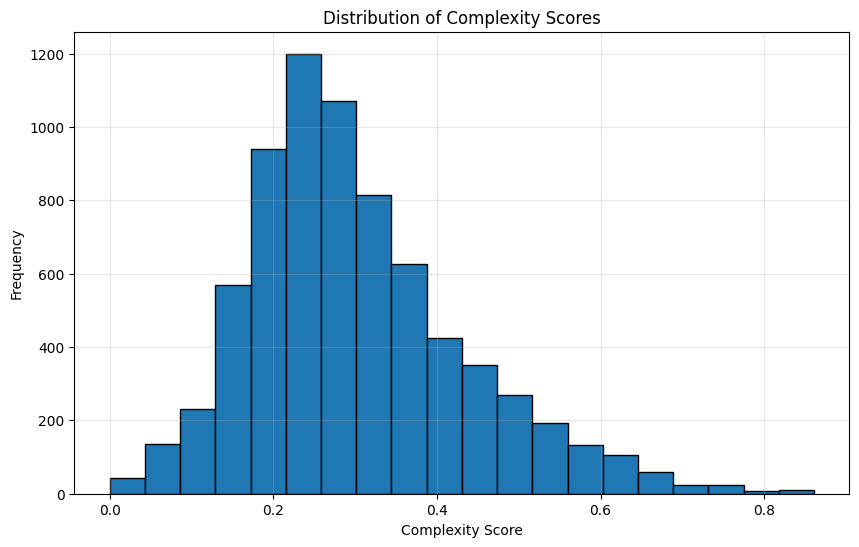

<Figure size 640x480 with 0 Axes>

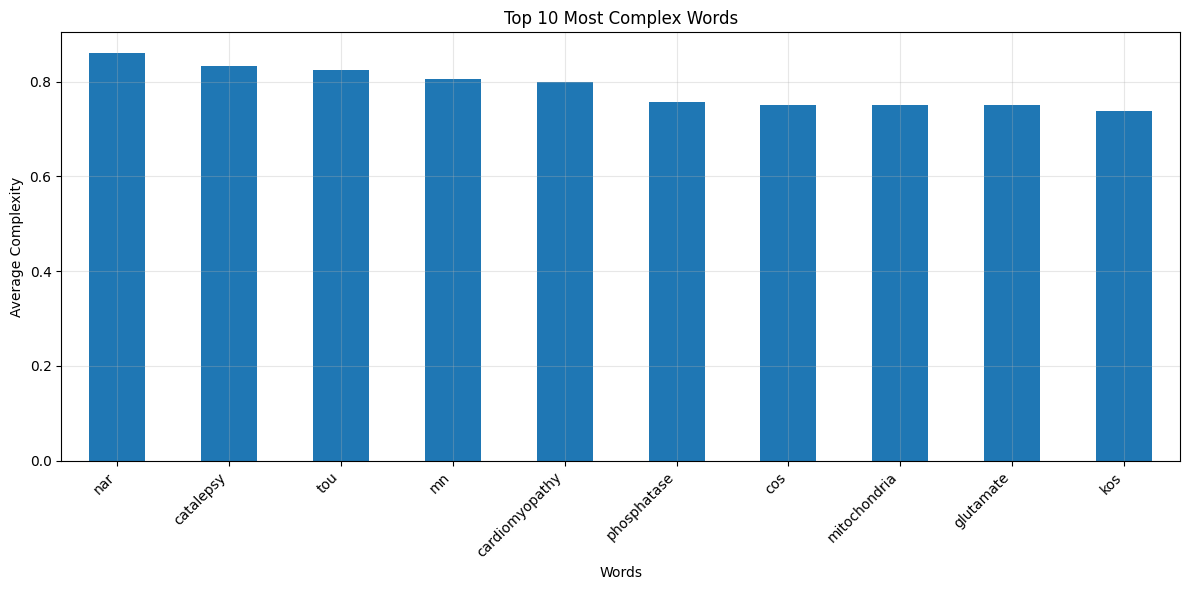

<Figure size 640x480 with 0 Axes>

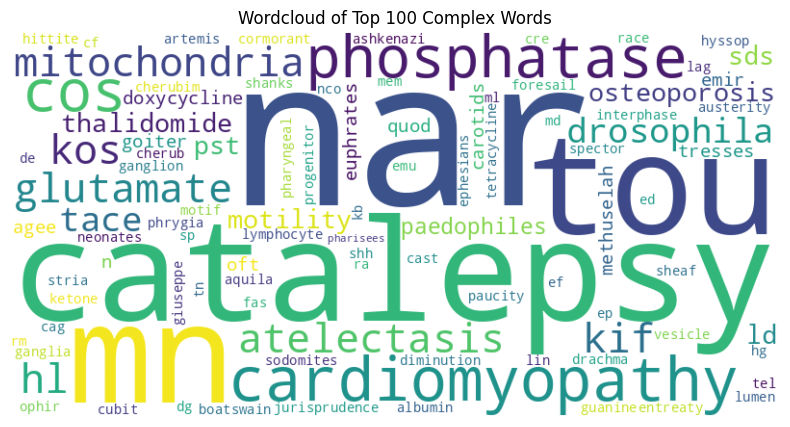

<Figure size 640x480 with 0 Axes>

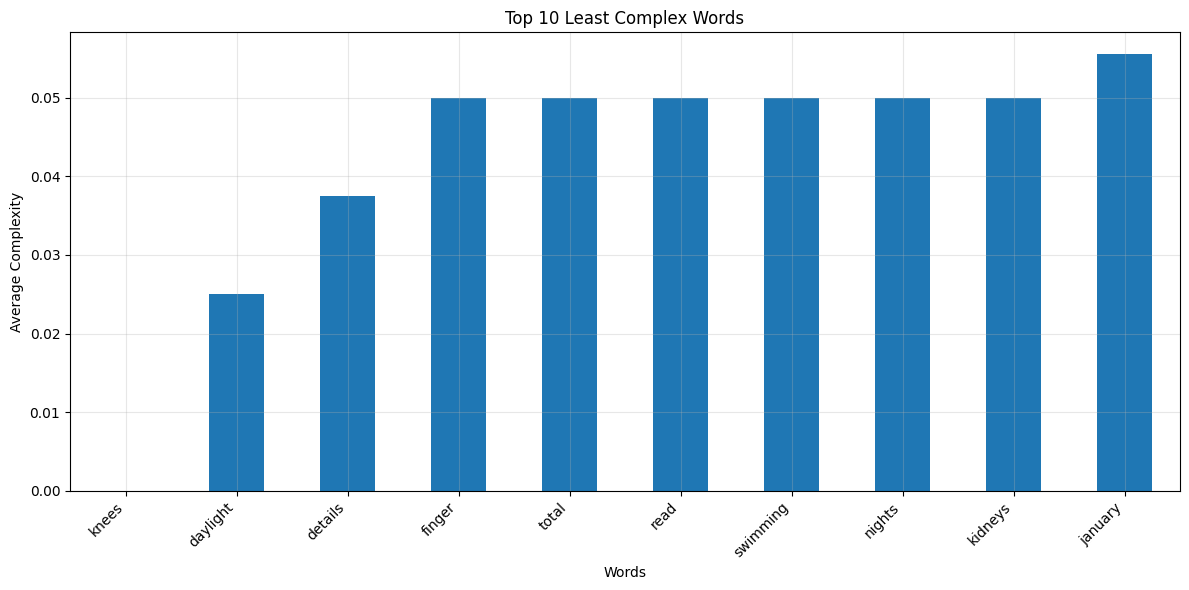

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming the dataset is already loaded into complex_train_df
# If not, you can load it using the load_dataset function
# complex_train_df = load_dataset(train_path)

# Ensure tokens are in lowercase for consistency
complex_train_df['token'] = complex_train_df['token'].str.lower()

# 1. Complexity Distribution
# Plot histogram of complexity scores
plt.figure(figsize=(10, 6))
plt.hist(complex_train_df['complexity'], bins=20, edgecolor='black')
plt.title('Distribution of Complexity Scores')
plt.xlabel('Complexity Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()
plt.savefig('/content/complexity_distribution.png')
print("\n")

# 2. Top 10 Most Complex Words
# Calculate average complexity per word
word_complexity = complex_train_df.groupby('token')['complexity'].mean().sort_values(ascending=False)
top_10 = word_complexity.head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar')
plt.title('Top 10 Most Complex Words')
plt.xlabel('Words')
plt.ylabel('Average Complexity')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('/content/top_10_complex_words.png')
print("\n")

# 3. Wordcloud of Top 100 Complex Words
# Select top 100 complex words
top_100 = word_complexity.head(100)
word_freq = dict(top_100)

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Save the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Top 100 Complex Words')
plt.show()
plt.savefig('/content/top_100_complex_wordcloud.png')
print("\n")

# 2. Top 10 Least Complex Words
# Calculate average complexity per word
word_complexity = complex_train_df.groupby('token')['complexity'].mean().sort_values(ascending=True)
top_10 = word_complexity.head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar')
plt.title('Top 10 Least Complex Words')
plt.xlabel('Words')
plt.ylabel('Average Complexity')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('/content/top_10_least_complex_words.png')
print("\n")

### Section 3: Complexity Dataset Class

This section defines the custom ComplexityDataset class that is used to tokenize the CompLex dataset

In [4]:
from torch.utils.data import Dataset
import torch

class ComplexityDataset(Dataset):
    def __init__(self, df, tokenizer): # Pass tokenizer to __init__
        """
        Initialize the dataset with the given DataFrame.

        Parameters:
        df (pd.DataFrame): DataFrame containing 'sentence', 'token', and 'complexity'.
        tokenizer: The tokenizer to use for tokenization.
        """
        self.sentences = df['sentence'].tolist()
        self.tokens = df['token'].tolist()
        self.labels = df['complexity'].tolist()
        self.tokenizer = tokenizer # Store tokenizer as an instance variable

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        """
        Get the item at the given index.

        Parameters:
        idx (int): Index of the item.

        Returns:
        dict: Dictionary containing input_ids, attention_mask, target_idx, and label.
        """
        sentence = self.sentences[idx]
        target = self.tokens[idx]
        label = self.labels[idx]

        # Tokenize sentence using self.tokenizer
        inputs = self.tokenizer(sentence, return_tensors='pt', padding='max_length', max_length=128, truncation=True)
        tokens = self.tokenizer.tokenize(sentence)

        # Find the index of the target token
        target_lower = str(target).lower()
        target_idx = tokens.index(target_lower) if target_lower in tokens else 0
        target_idx = torch.tensor(target_idx, dtype=torch.long)
        target_idx = torch.clamp(target_idx, 0, inputs['input_ids'].shape[1] - 1)

        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'target_idx': target_idx,
            'label': torch.tensor(label, dtype=torch.float)
        }

### Section 4: Initialize the BERT and RoBERTa models and Train with CompLex dataset

This section is used for the model initialization and training. The best models are stored in the defined path after training:

**Important Note:** If you do not want to run the training code for each of these models, then you can download the trained model parameters from the below links and upload them to the session storage.
    
    - CWI BERT model: https://drive.google.com/drive/folders/1lJvZMnqxa8xysjkETOW0hervhYLhncso?usp=sharing
    - CWI RoBERTa model: https://drive.google.com/drive/folders/15Hhzetsey_PKRgwmvlYHeOsylRIJDv0Q?usp=sharing

If you are uploading the saved model then you can skip executing the training cells

In [5]:
from torch.utils.data import DataLoader

def initialize_bert_model():
    """
    Initialize the BERT model and tokenizer.

    Returns:
    tuple: BERT model and tokenizer.
    """
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=1)  # Regression head
    return bert_model, bert_tokenizer

def initialize_roberta_model():
    """
    Initialize the RoBERTa model and tokenizer.

    Returns:
    tuple: RoBERTa model and tokenizer.
    """
    roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
    roberta_model = RobertaForTokenClassification.from_pretrained('roberta-large', num_labels=1)  # Regression head
    return roberta_model, roberta_tokenizer

def train_bert_model(bert_model, train_loader, epochs=8):
    """
    Train the bert model on the given data loader.

    Parameters:
    bert_model (BertForTokenClassification): The model to train.
    train_loader (DataLoader): DataLoader for training data.
    epochs (int): Number of training epochs.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    bert_model.to(device)
    optimizer = torch.optim.AdamW(bert_model.parameters(), lr=1e-5)

    bert_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            target_idx = batch['target_idx'].to(device, dtype=torch.long)
            labels = batch['label'].to(device)

            outputs = bert_model(input_ids, attention_mask=attention_mask).logits
            target_idx = torch.clamp(target_idx, 0, outputs.shape[1] - 1)
            preds = torch.gather(outputs.squeeze(-1), 1, target_idx.unsqueeze(-1)).squeeze(-1)

            loss = torch.nn.MSELoss()(preds, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Average Loss: {total_loss / len(train_loader):.4f}")

def train_roberta_model(roberta_model, train_loader, epochs=3):
    """
    Train the RoBERTa model on the given data loader.

    Parameters:
    roberta_model (BertForTokenClassification): The model to train.
    train_loader (DataLoader): DataLoader for training data.
    epochs (int): Number of training epochs.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    roberta_model.to(device)
    optimizer = torch.optim.AdamW(roberta_model.parameters(), lr=1e-5)

    roberta_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            target_idx = batch['target_idx'].to(device, dtype=torch.long)
            labels = batch['label'].to(device)

            outputs = roberta_model(input_ids, attention_mask=attention_mask).logits
            target_idx = torch.clamp(target_idx, 0, outputs.shape[1] - 1)
            preds = torch.gather(outputs.squeeze(-1), 1, target_idx.unsqueeze(-1)).squeeze(-1)

            loss = torch.nn.MSELoss()(preds, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Average Loss: {total_loss / len(train_loader):.4f}")

In [19]:
# Initialize BERT model and tokenizer
bert_model, bert_tokenizer = initialize_bert_model()

# Create dataset and data loader
complex_dataset = ComplexityDataset(complex_train_df, bert_tokenizer) # Pass bert_tokenizer to ComplexityDataset
train_loader = DataLoader(complex_dataset, batch_size=16, shuffle=True)

# Train the model
train_bert_model(bert_model, train_loader)

# Save the trained model (Update with the correct path)
bert_model.save_pretrained('/content/cwi_model_bert')
bert_tokenizer.save_pretrained('/content/cwi_model_bert')

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 0.0247
Epoch 2, Average Loss: 0.0126
Epoch 3, Average Loss: 0.0110
Epoch 4, Average Loss: 0.0097
Epoch 5, Average Loss: 0.0082
Epoch 6, Average Loss: 0.0070
Epoch 7, Average Loss: 0.0061
Epoch 8, Average Loss: 0.0048


('/content/drive/MyDrive/Lexical Simplification/cwi_model_bert/tokenizer_config.json',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_bert/special_tokens_map.json',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_bert/vocab.txt',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_bert/added_tokens.json')

In [20]:
# Initialize RoBERTa model and tokenizer
roberta_model, roberta_tokenizer = initialize_roberta_model()

# Create dataset and data loader
complex_dataset = ComplexityDataset(complex_train_df,roberta_tokenizer)
train_loader = DataLoader(complex_dataset, batch_size=16, shuffle=True)

# Train the model
train_roberta_model(roberta_model, train_loader)

# Save the trained model
roberta_model.save_pretrained('/content/cwi_model_roberta')
roberta_tokenizer.save_pretrained('/content/cwi_model_roberta')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 0.0315
Epoch 2, Average Loss: 0.0264
Epoch 3, Average Loss: 0.0247
Epoch 4, Average Loss: 0.0218
Epoch 5, Average Loss: 0.0203


('/content/drive/MyDrive/Lexical Simplification/cwi_model_roberta/tokenizer_config.json',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_roberta/special_tokens_map.json',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_roberta/vocab.json',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_roberta/merges.txt',
 '/content/drive/MyDrive/Lexical Simplification/cwi_model_roberta/added_tokens.json')

### Section 5: Evaluate the models on the trial dataset

In this step, we use the trained BERT and RoBERTa models for complexity prediction and evaluate it on the trial set. The complexity prediction is also demonstrated with an example

======= Evaluation Metrics for BERT ==========
MSE on trial dataset: 0.0104
RMSE on trial dataset: 0.1020
R² on trial dataset: 0.5349
Accuracy on trial dataset: 0.7942
Pearson correlation on trial dataset: 0.7323
Spearman correlation on trial dataset: 0.7141




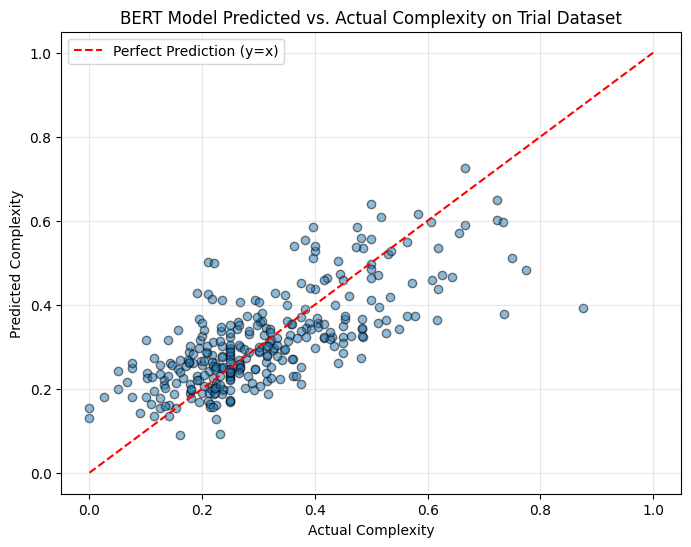



======= Evaluation Metrics for RoBERTa ==========
MSE on trial dataset: 0.0229
RMSE on trial dataset: 0.1515
R² on trial dataset: -0.0256
Accuracy on trial dataset: 0.4437
Pearson correlation on trial dataset: 0.1282
Spearman correlation on trial dataset: 0.0969




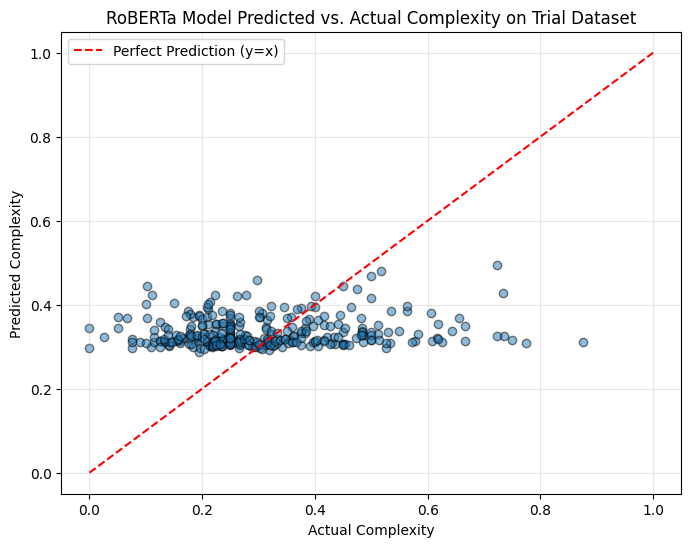

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from scipy.stats import pearsonr, spearmanr
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import numpy as np

def load_trained_bert_model(model_path):
    """
    Load the trained BERT model and tokenizer from the given path.

    Parameters:
    model_path (str): Path to the saved model.

    Returns:
    tuple: Loaded model and tokenizer.
    """
    bert_model = BertForTokenClassification.from_pretrained(model_path).to(device)
    bert_tokenizer = BertTokenizer.from_pretrained(model_path)
    return bert_model, bert_tokenizer

def load_trained_roberta_model(model_path):
    """
    Load the trained RoBERTa model and tokenizer from the given path.

    Parameters:
    model_path (str): Path to the saved model.

    Returns:
    tuple: Loaded model and tokenizer.
    """
    roberta_model = RobertaForTokenClassification.from_pretrained(model_path).to(device)
    roberta_tokenizer = RobertaTokenizer.from_pretrained(model_path)
    return roberta_model, roberta_tokenizer

def evaluate_complexity(model, data_loader):
    """
    Evaluate the model on the given data loader.

    Parameters:
    model (BertForTokenClassification): The model to evaluate.
    data_loader (DataLoader): DataLoader for evaluation data.

    Returns:
    tuple: Predictions and true labels.
    """
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            target_idx = batch['target_idx'].to(device, dtype=torch.long)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask).logits
            target_idx = torch.clamp(target_idx, 0, outputs.shape[1] - 1)
            preds = torch.gather(outputs.squeeze(-1), 1, target_idx.unsqueeze(-1)).squeeze(-1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return predictions, true_labels

def compute_metrics(predictions, true_labels, threshold=0.3):
    """
    Compute evaluation metrics for complexity prediction.

    Parameters:
    predictions (list): Predicted complexity scores.
    true_labels (list): True complexity scores.
    threshold (float): Threshold for binary classification accuracy.

    Returns:
    dict: Dictionary containing MSE, MAE, RMSE, R², Accuracy, Pearson correlation, Spearman correlation, and MAPE.
    """
    # Original metrics
    mse = mean_squared_error(true_labels, predictions)
    pred_binary = [1 if p > threshold else 0 for p in predictions]
    true_binary = [1 if t > threshold else 0 for t in true_labels]
    accuracy = accuracy_score(true_binary, pred_binary)
    pearson_corr, _ = pearsonr(predictions, true_labels)

    # Additional metrics
    mae = mean_absolute_error(true_labels, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_labels, predictions)
    spearman_corr, _ = spearmanr(predictions, true_labels)

    # Compute MAPE, avoiding division by zero
    mape = 0
    valid_count = 0
    for true, pred in zip(true_labels, predictions):
        if abs(true) > 1e-10:  # Avoid division by zero
            mape += abs((true - pred) / true)
            valid_count += 1
    mape = (mape / valid_count * 100) if valid_count > 0 else float('inf')

    return {
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Accuracy': accuracy,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr,
    }

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create trial dataset and data loader
trial_dataset = ComplexityDataset(complex_trial_df, bert_tokenizer) # Pass bert_tokenizer to ComplexityDataset
trial_loader = DataLoader(trial_dataset, batch_size=8, shuffle=False)

# Load trained BERT model and tokenizer (Update with the correct trained model path)
model_path = '/content/cwi_model_bert'
bert_complexity_model, bert_tokenizer = load_trained_bert_model(model_path)

# Evaluate the BERT model
predictions, true_labels = evaluate_complexity(bert_complexity_model, trial_loader)

# Compute and print metrics
metrics = compute_metrics(predictions, true_labels)
print("======= Evaluation Metrics for BERT ==========")
print(f"MSE on trial dataset: {metrics['MSE']:.4f}")
print(f"RMSE on trial dataset: {metrics['RMSE']:.4f}")
print(f"R² on trial dataset: {metrics['R²']:.4f}")
print(f"Accuracy on trial dataset: {metrics['Accuracy']:.4f}")
print(f"Pearson correlation on trial dataset: {metrics['Pearson Correlation']:.4f}")
print(f"Spearman correlation on trial dataset: {metrics['Spearman Correlation']:.4f}")
print("======================")
print("\n")

# 1. Scatter Plot: Predicted vs. Actual Complexity
plt.figure(figsize=(8, 6))
plt.scatter(true_labels, predictions, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Complexity')
plt.ylabel('Predicted Complexity')
plt.title('BERT Model Predicted vs. Actual Complexity on Trial Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/content/predicted_vs_actual_complexity_bert.png')
plt.show()
plt.close()

# Load trained RoBERTa model and tokenizer (Update with correct RoBERTa Model path)
model_path = '/content/cwi_model_roberta'
roberta_complexity_model, roberta_tokenizer = load_trained_roberta_model(model_path)

# Evaluate the RoBERTa model
predictions, true_labels = evaluate_complexity(roberta_complexity_model, trial_loader)

# Compute and print metrics
metrics = compute_metrics(predictions, true_labels)
print("\n")
print("======= Evaluation Metrics for RoBERTa ==========")
print(f"MSE on trial dataset: {metrics['MSE']:.4f}")
print(f"RMSE on trial dataset: {metrics['RMSE']:.4f}")
print(f"R² on trial dataset: {metrics['R²']:.4f}")
print(f"Accuracy on trial dataset: {metrics['Accuracy']:.4f}")
print(f"Pearson correlation on trial dataset: {metrics['Pearson Correlation']:.4f}")
print(f"Spearman correlation on trial dataset: {metrics['Spearman Correlation']:.4f}")
print("======================")
print("\n")

# 1. Scatter Plot: Predicted vs. Actual Complexity
plt.figure(figsize=(8, 6))
plt.scatter(true_labels, predictions, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Complexity')
plt.ylabel('Predicted Complexity')
plt.title('RoBERTa Model Predicted vs. Actual Complexity on Trial Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/content/predicted_vs_actual_complexity_roberta.png')
plt.show()
plt.close()

In [11]:
import torch

def predict_complexity(sentence, target, model, tokenizer):
    """
    Predict the complexity of a target word in a sentence.

    Parameters:
    sentence (str): Input sentence.
    target (str): Target word.
    model (BertForTokenClassification): Trained model.
    tokenizer (BertTokenizer): Tokenizer.

    Returns:
    float: Predicted complexity score.
    """
    model.eval()
    inputs = tokenizer(sentence, return_tensors='pt', padding='max_length', max_length=128, truncation=True)
    tokens = tokenizer.tokenize(sentence)
    target_idx = tokens.index(target.lower()) if target.lower() in tokens else 0

    with torch.no_grad():
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs).logits
        complexity = outputs[0, target_idx, 0].item()  # Complexity score
    return complexity

def demonstrate_complexity_prediction(examples, model, tokenizer):
    """
    Demonstrate complexity prediction on a list of examples.

    Parameters:
    examples (list): List of dictionaries containing 'sentence' and 'target'.
    model (BertForTokenClassification): Trained model.
    tokenizer (BertTokenizer): Tokenizer.
    """
    for i, example in enumerate(examples, 1):
        sentence = example['sentence']
        target = example['target']
        predicted_complexity = predict_complexity(sentence, target, model, tokenizer)
        print(f"Example {i}:")
        print(f"Sentence: {sentence}")
        print(f"Target word: {target}")
        print(f"Predicted complexity: {predicted_complexity:.4f}")
        print("-" * 50)

# Define examples
examples = [
    {
        'sentence': "Lebanon is sharply split along sectarian lines, with 18 religious sects.",
        'target': "sectarian"
    },
    {
        'sentence': "but he whose genealogy is not counted from them has accepted tithes from Abraham, and has blessed him who has the promises.",
        'target': "genealogy"
    }
]

# Demonstrate complexity prediction
print("Demonstrating complexity prediction with BERT model:")
demonstrate_complexity_prediction(examples, bert_complexity_model, bert_tokenizer)

print("\nDemonstrating complexity prediction with RoBERTa model:")
demonstrate_complexity_prediction(examples, roberta_complexity_model, roberta_tokenizer)

Demonstrating complexity prediction with BERT model:
Example 1:
Sentence: Lebanon is sharply split along sectarian lines, with 18 religious sects.
Target word: sectarian
Predicted complexity: 0.3601
--------------------------------------------------
Example 2:
Sentence: but he whose genealogy is not counted from them has accepted tithes from Abraham, and has blessed him who has the promises.
Target word: genealogy
Predicted complexity: 0.3241
--------------------------------------------------

Demonstrating complexity prediction with RoBERTa model:
Example 1:
Sentence: Lebanon is sharply split along sectarian lines, with 18 religious sects.
Target word: sectarian
Predicted complexity: 0.3189
--------------------------------------------------
Example 2:
Sentence: but he whose genealogy is not counted from them has accepted tithes from Abraham, and has blessed him who has the promises.
Target word: genealogy
Predicted complexity: 0.3924
--------------------------------------------------
